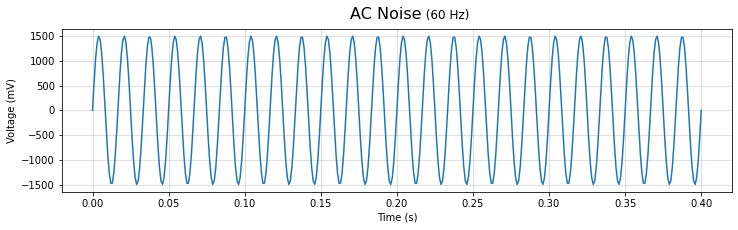

In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt

start = 0
end = 0.4
dn = 401  # !!sampling rate : 1000 Hz

x = np.linspace(start,end,dn)
noi_data = 1500*np.sin(x*math.pi*2*60)  # 교류 전원 노이즈 (60 Hz)
plt.figure(figsize=(12,3))
plt.suptitle('AC Noise',size=16)
plt.title('                          (60 Hz)',pad=10)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (mV)')
plt.grid(which='both',axis='both',alpha=0.5)
plt.plot(x,noi_data);

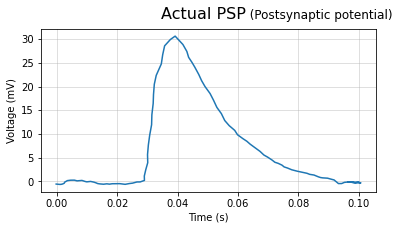

In [2]:
import csv  # psp 가정
f = open("C:/Users/enjdn/Documents/MEG_python/MEG_data_artifi/psp5.csv","rt")
reader = csv.reader(f)

col1 = []
col2 = []
for row in reader:
    col1.append(row[0])
    col2.append(row[1])

del col1[0]
del col2[0]

len(col1)

time = np.array(list(map(float, col1)))
volt = np.array(list(map(float, col2)))
plt.figure(figsize=(6, 3))  # 실제 psp 그래프
plt.suptitle('Actual PSP',size=16)
plt.title('                                                          (Postsynaptic potential)',pad=10)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (mV)')
plt.grid(which='major',axis='both',alpha=0.5)
plt.plot(time,volt);

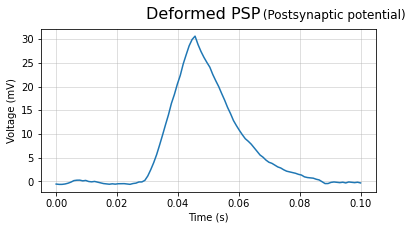

In [3]:
n = 104
x_2 = np.linspace(0,0.1,n)  # scale 조정을 위해 변형된 psp 그래프
plt.figure(figsize=(6, 3))
plt.suptitle('Deformed PSP',size=16)
plt.title('                                                                 (Postsynaptic potential)',pad=10)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (mV)')
plt.grid(which='major',axis='both',alpha=0.5)
plt.plot(x_2,volt);

401

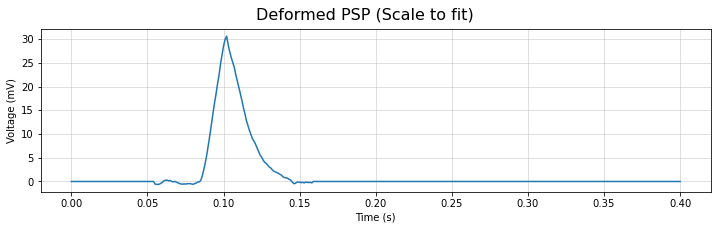

In [4]:
c = np.zeros(shape=(55,), dtype=np.int8)  # signal 0.01 s 로 
volt_1 = np.concatenate((c, volt), axis=None)
d = np.zeros(shape=(242,), dtype=np.int8)
volt_2 = np.concatenate((volt_1, d), axis=None)

plt.figure(figsize=(12,3))
plt.suptitle('Deformed PSP (Scale to fit)',size=16)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (mV)')
plt.grid(which='major',axis='both',alpha=0.5)
plt.plot(x,volt_2);  # noise와 scale 맞추기
len(volt_2)

In [5]:
# Biot-Savart Law에 따른 signal 자기장

n,m = 9, 9
sensor_array = np.zeros((n,m), dtype = np.ndarray)  # n X m 채널 sensor의 위치
for i in range(n):
    for j in range(m):
        sensor_array[i,j] = np.array([4*(i-(n-1)/2),4*(j-(m-1)/2),4])  # [0,0]으로 위치 세팅 & 채널 간격 4cm

sig = np.array([1,1,0])  # signal의 방향 및 크기 (4 cm 로 가정)
noi_20 = np.array([0,20000,4])  # noise의 위치(20 m로 가정)  


dl_vec_sig = sig/np.linalg.norm(sig)  # signal의 단위 벡터

R_sig = np.zeros((n,m), dtype = np.ndarray)  # 각각의 sensor 채널과 signal이 떨어진 거리 R
for i in range(n):
    for j in range(m):
        R_sig[i,j] = np.linalg.norm(sensor_array[i,j])

a_R_sig = sensor_array/R_sig  # 각각의 sensor 채널을 향하는 R의 단위벡터 a_R

H_vec_sig = np.zeros((n,m), dtype = np.ndarray)  # 각각의 sensor에 들어오는 signal 벡터의 크기
for i in range(n):
    for j in range(m):
        H_vec_sig[i,j] = np.cross(dl_vec_sig,a_R_sig[i,j])


H_sig = np.zeros((n,m), dtype = np.ndarray)  # 각각의 sensor에 들어오는 최종 signal의 자기장 (with Biot-Savart Law) 
for i in range(n):
    for j in range(m):
        g_noise = np.random.randn(401)  # 가우시안 noise 생성 
        H_sig[i,j]  = (float(H_vec_sig[i,j][2])/((4*np.pi)*float(R_sig[i,j])**2))*volt_2 + g_noise*0.001
      
    
R_noi_20 = np.zeros((n,m), dtype = np.ndarray)  # 각각의 sensor 채널과 noise가 떨어진 거리 R (20 m)
for i in range(n):
    for j in range(m):
        R_noi_20[i,j] = np.linalg.norm(sensor_array[i,j]-noi_20)

H_noi_20 = np.zeros((n,m), dtype = np.ndarray)  # 각각의 sensor에 들어오는 최종 noise의 자기장 (with Biot-Savart Law) (20 m)
for i in range(n):
    for j in range(m):
        H_noi_20[i,j] = noi_data/(2*np.pi*R_noi_20[i,j])

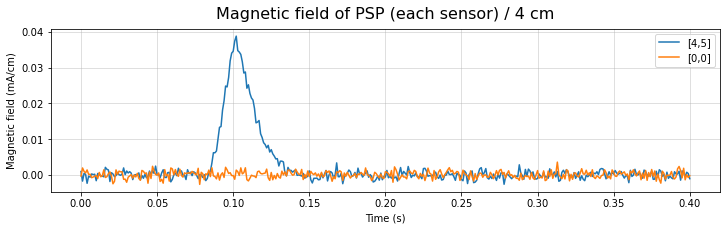

In [6]:
plt.figure(figsize=(12, 3)) # Sensor에 들어오는 최종 signal의 자기장 (with Biot-Savart Law) + 각 채널에 가우시안 noise 
plt.title('Magnetic field of PSP (each sensor) / 4 cm',size=16, pad=10)
plt.xlabel('Time (s)')
plt.ylabel('Magnetic field (mA/cm)')
plt.grid(which='both',axis='both',alpha=0.5)
plt.plot(x,H_sig[4,5], label='[4,5]')  # Sensor[4,5]에서 signal
plt.plot(x,H_sig[0,0], label='[0,0]')  # Sensor[0,0]에서 signal
plt.legend();

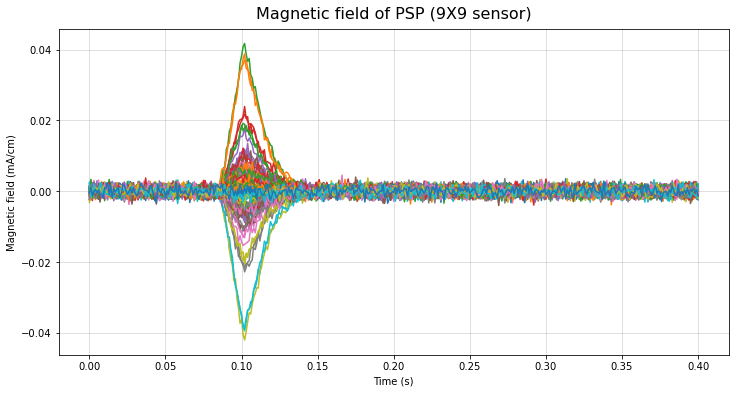

In [7]:
plt.figure(figsize=(12, 6)) # 9 X 9 Sensor에 들어오는 최종 signal의 자기장
plt.title('Magnetic field of PSP (9X9 sensor)',size=16, pad=10)
plt.xlabel('Time (s)')
plt.ylabel('Magnetic field (mA/cm)')
plt.grid(which='both',axis='both',alpha=0.5)
for i in range(n):
    for j in range(m):
        plt.plot(x,H_sig[i,j])

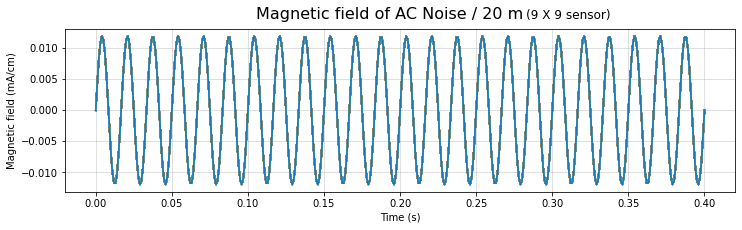

In [8]:
plt.figure(figsize=(12, 3))  # 각각의 sensor 채널과 noise가 떨어진 거리 R (20 m)
plt.suptitle('Magnetic field of AC Noise / 20 m',size=16)
plt.title('                                                                                       (9 X 9 sensor)',pad=10)
plt.xlabel('Time (s)')
plt.ylabel('Magnetic field (mA/cm)')
plt.grid(which='both',axis='both',alpha=0.5)
for i in range(n):
    for j in range(m):
        plt.plot(x,H_noi_20[i,j])

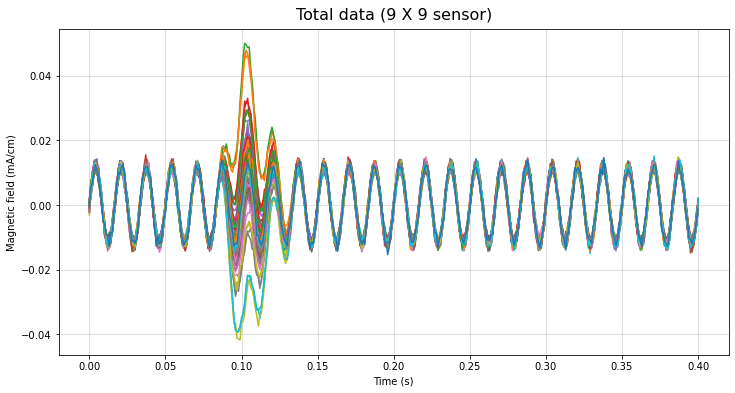

In [9]:
plt.figure(figsize=(12, 6))  # 각각의 sensor 에서 받아들인 총 데이터 (20 m)
plt.title('Total data (9 X 9 sensor)',size=16, pad=10)
plt.xlabel('Time (s)')
plt.ylabel('Magnetic field (mA/cm)')
plt.grid(which='both',axis='both',alpha=0.5)
for i in range(n):
    for j in range(m):
        plt.plot(x, H_sig[i,j] + H_noi_20[i,j])

In [10]:
H_all_f_20 = []  # 각각의 sensor 에서 받아들인 총 신호  (20 m)
for i in range(n):
    for j in range(m):
        H_all_f_20.append(list(H_sig[i,j] + H_noi_20[i,j]))
len(H_all_f_20)

81

In [11]:
import pandas as pd

# frame = pd.DataFrame(H_all_f)

start = 0
end = 0.4
dn = 401  # !!sampling rate : 1000 Hz
x = np.linspace(start,end,dn)

indexName_col = x  # Data frame에 각 센서별 데이터 기록
indexName = []
for i in range(n*m):
    indexName.append('Sensor_'+str(i+1))
df = pd.DataFrame(H_all_f_20, columns = indexName_col,index = indexName)
df

,0.000,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,...,0.391,0.392,0.393,0.394,0.395,0.396,0.397,0.398,0.399,0.400
Sensor_1,-0.000350,0.006302,0.009122,0.011315,0.013262,0.011455,0.009347,0.004929,0.000862,-0.003389,...,0.002360,0.000166,-0.003426,-0.007992,-0.012197,-0.010068,-0.012193,-0.008147,-0.005147,-0.000276
Sensor_2,-0.000638,0.004227,0.007349,0.010194,0.012233,0.012089,0.010067,0.004847,0.002312,-0.004256,...,0.004041,-0.000856,-0.006239,-0.010702,-0.011618,-0.010355,-0.009139,-0.010075,-0.003690,-0.001718
Sensor_3,0.000163,0.004680,0.007999,0.010724,0.011629,0.011925,0.006980,0.004456,0.001740,-0.004354,...,0.005128,-0.000175,-0.007123,-0.009009,-0.011293,-0.011585,-0.011987,-0.009257,-0.005004,-0.000084
Sensor_4,-0.000035,0.004314,0.008084,0.012603,0.012223,0.012961,0.010942,0.006308,0.001433,-0.002147,...,0.005172,-0.001595,-0.004577,-0.008335,-0.009928,-0.013303,-0.012372,-0.007894,-0.004414,0.001206
Sensor_5,-0.001527,0.003625,0.009176,0.011844,0.012332,0.012077,0.007071,0.005834,0.003377,-0.002081,...,0.001920,-0.001299,-0.006562,-0.008006,-0.009635,-0.012193,-0.009480,-0.007985,-0.004598,0.002008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sensor_77,-0.001974,0.003024,0.007393,0.012593,0.012092,0.012062,0.009312,0.005328,0.000128,-0.002420,...,0.003165,0.000410,-0.005669,-0.008622,-0.010639,-0.011520,-0.009992,-0.006795,-0.003656,-0.000352
Sensor_78,-0.002344,0.005600,0.008283,0.010760,0.011285,0.011124,0.009558,0.006319,0.000722,-0.001870,...,0.002320,-0.002280,-0.007345,-0.010415,-0.012140,-0.010000,-0.009426,-0.007289,-0.004004,0.000433
Sensor_79,0.000265,0.004004,0.008957,0.011080,0.013089,0.011391,0.010296,0.006642,0.001381,-0.001545,...,0.002190,-0.001544,-0.004003,-0.009499,-0.011181,-0.012555,-0.010350,-0.007962,-0.004219,-0.002027
Sensor_80,0.002540,0.002907,0.006841,0.012962,0.011687,0.011363,0.009581,0.008142,0.002783,-0.004329,...,0.003322,-0.001394,-0.006167,-0.010688,-0.013241,-0.012271,-0.011566,-0.009369,-0.006097,0.001662


In [12]:
from sklearn.preprocessing import StandardScaler
for i in range(401):
    indexName_col[i] = indexName_col[i]
time = indexName_col

Sensor_x = df.loc[:,time].values
    
x_std = StandardScaler().fit_transform(Sensor_x.T)
x_std.shape

(401, 81)

In [13]:
time_f = x_std.T
covariance_matrix = np.cov(time_f)
# np.set_printoptions(threshold=np.inf,linewidth=np.inf)  # '...' 생략 없이 출력
covariance_matrix.shape

(81, 81)

In [14]:
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)

In [15]:
# 주성분별 데이터를 설명하는 정도 (10000% 기준)

print('PC1 = ',round(float(eig_vals[0]/sum(eig_vals))*10000,2),'%')
print('PC2 = ',round(float(eig_vals[1]/sum(eig_vals))*10000,2),'%')
print('PC3 = ',round(float(eig_vals[2]/sum(eig_vals))*10000,2),'%')
print('PC4 = ',round(float(eig_vals[3]/sum(eig_vals))*10000,2),'%')

PC1 =  9254.33 %
PC2 =  620.06 %
PC3 =  3.29 %
PC4 =  3.26 %


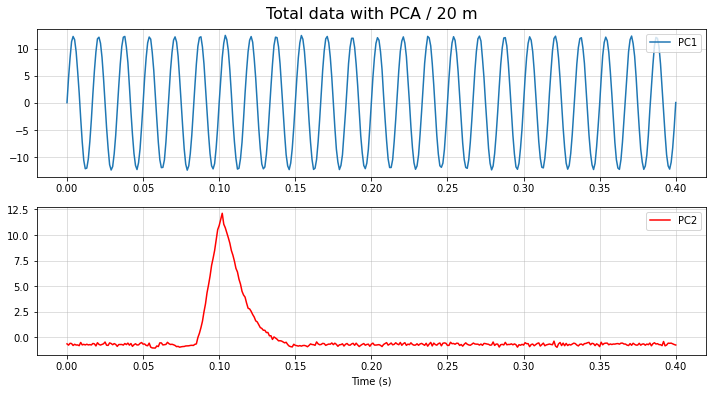

In [16]:
plt.figure(figsize=(12,6)) 
plt.subplot(2,1,1)
plt.title('Total data with PCA / 20 m',size=16, pad=10)
plt.grid(which='both',axis='both',alpha=0.5)
x_pc1 = x_std.dot(eig_vecs.T[0])
plt.plot(time,x_pc1.T,label='PC1')
plt.legend(loc='upper right')

plt.subplot(2,1,2)
plt.xlabel('Time (s)')
plt.grid(which='both',axis='both',alpha=0.5)
x_pc2 = x_std.dot(eig_vecs.T[1])
plt.plot(time,x_pc2.T, color='red',label='PC2')
plt.legend(loc='upper right');